## 데이터 불러들이기

In [ ]:
!pip install wordcloud

In [ ]:
!pip install Image

In [ ]:
from PIL import Image

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from matplotlib import rc
from matplotlib import font_manager as fm
from matplotlib import rcParams
import matplotlib as mpl
#nanum 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
#여기가 폰트 사이즈를 정하는 곳.
font_name = fm.FontProperties(fname=font_path, size=16).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

sys_font number: 48
nanum_font number: 31
NanumBarunGothic


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/drive/My Drive/BigCon_BiKong/Data(given)/03_SNS데이터(와이즈넛)_민균/2020 bigcontest data_wisenut.csv', encoding='utf-8', sep='')

# 개요
- 일단 총 35개의 행, 생각보다 엄청난 데이터는 아니다
    - 서울 중구   -> 13개 행정동
    - 서울 노원구 -> 5개 행정동
    - 대구 수성구 -> 11개 행정동
    - 대구 중구   -> 6개 행정동
    
    그래서 총 35개의 행으로 이루어진 데이터

In [ ]:
# 뉴스 건수, 블로그 건수, 카페 건수 명
news_cnt_2019 =  ['NEWS_CNT_201902','NEWS_CNT_201903','NEWS_CNT_201904','NEWS_CNT_201905']
news_cnt_2020 = ['NEWS_CNT_202002','NEWS_CNT_202003','NEWS_CNT_202004','NEWS_CNT_202005']
blog_cnt_2019 = ['BLOG_CNT_201902','BLOG_CNT_201903','BLOG_CNT_201904','BLOG_CNT_201905']
blog_cnt_2020 = ['BLOG_CNT_202002','BLOG_CNT_202003','BLOG_CNT_202004','BLOG_CNT_202005']
cafe_cnt_2019 = ['CAFE_CNT_201902','CAFE_CNT_201903','CAFE_CNT_201904','CAFE_CNT_201905']
cafe_cnt_2020 = ['CAFE_CNT_202002','CAFE_CNT_202003','CAFE_CNT_202004','CAFE_CNT_202005']


In [ ]:
# 구+행정동에 대한 화제어
topics2019 = ['UP_TOPIC_201902', 'UP_TOPIC_201903', 'UP_TOPIC_201904', 'UP_TOPIC_201905']
topics2020 = ['UP_TOPIC_202002', 'UP_TOPIC_202003', 'UP_TOPIC_202004', 'UP_TOPIC_202005']


In [ ]:
#숙박에 대한 긍정 게시량
up1_pos_2019 = ['UP1_POSITIVE_201902', 'UP1_POSITIVE_201903', 'UP1_POSITIVE_201904', 'UP1_POSITIVE_201905']
up1_pos_2020 = ['UP1_POSITIVE_202002', 'UP1_POSITIVE_202003', 'UP1_POSITIVE_202004', 'UP1_POSITIVE_202005']

#레저업소에 대한 긍정 게시량
up2_pos_2019 = ['UP2_POSITIVE_201902', 'UP2_POSITIVE_201903', 'UP2_POSITIVE_201904', 'UP2_POSITIVE_201905']
up2_pos_2020 = ['UP2_POSITIVE_202002', 'UP2_POSITIVE_202003', 'UP2_POSITIVE_202004', 'UP2_POSITIVE_202005']

# 문화취미에 대한 긍정 게시량
up3_pos_2019 = ['UP3_POSITIVE_201902', 'UP3_POSITIVE_201903', 'UP3_POSITIVE_201904', 'UP3_POSITIVE_201905']
up3_pos_2020 = ['UP3_POSITIVE_202002', 'UP3_POSITIVE_202003', 'UP3_POSITIVE_202004', 'UP3_POSITIVE_202005']

# 의료기관에 대한 긍정 게시량
up4_pos_2019 = ['UP4_POSITIVE_201902', 'UP4_POSITIVE_201903', 'UP4_POSITIVE_201904', 'UP4_POSITIVE_201905']
up4_pos_2020 = ['UP4_POSITIVE_202002', 'UP4_POSITIVE_202003', 'UP4_POSITIVE_202004', 'UP4_POSITIVE_202005']

# 보건위성에 대한 긍정 게시량
up5_pos_2019 = ['UP5_POSITIVE_201902', 'UP5_POSITIVE_201903', 'UP5_POSITIVE_201904', 'UP5_POSITIVE_201905']
up5_pos_2020 = ['UP5_POSITIVE_202002', 'UP5_POSITIVE_202003', 'UP5_POSITIVE_202004', 'UP5_POSITIVE_202005']

# 요식업소에 대한 긍정 게시량
up6_pos_2019 = ['UP6_POSITIVE_201902', 'UP6_POSITIVE_201903', 'UP6_POSITIVE_201904', 'UP6_POSITIVE_201905']
up6_pos_2020 = ['UP6_POSITIVE_202002', 'UP6_POSITIVE_202003', 'UP6_POSITIVE_202004', 'UP6_POSITIVE_202005']

#숙박에 대한 부정 게시량
up1_neg_2019 = ['UP1_NEGATIVE_201902', 'UP1_NEGATIVE_201903', 'UP1_NEGATIVE_201904', 'UP1_NEGATIVE_201905']
up1_neg_2020 = ['UP1_NEGATIVE_202002', 'UP1_NEGATIVE_202003', 'UP1_NEGATIVE_202004', 'UP1_NEGATIVE_202005']

#레저업소에 대한 부정 게시량
up2_neg_2019 = ['UP2_NEGATIVE_201902', 'UP2_NEGATIVE_201903', 'UP2_NEGATIVE_201904', 'UP2_NEGATIVE_201905']
up2_neg_2020 = ['UP2_NEGATIVE_202002', 'UP2_NEGATIVE_202003', 'UP2_NEGATIVE_202004', 'UP2_NEGATIVE_202005']

# 문화취미에 대한 부정 게시량
up3_neg_2019 = ['UP3_NEGATIVE_201902', 'UP3_NEGATIVE_201903', 'UP3_NEGATIVE_201904', 'UP3_NEGATIVE_201905']
up3_neg_2020 = ['UP3_NEGATIVE_202002', 'UP3_NEGATIVE_202003', 'UP3_NEGATIVE_202004', 'UP3_NEGATIVE_202005']

# 의료기관에 대한 부정 게시량
up4_neg_2019 = ['UP4_NEGATIVE_201902', 'UP4_NEGATIVE_201903', 'UP4_NEGATIVE_201904', 'UP4_NEGATIVE_201905']
up4_neg_2020 = ['UP4_NEGATIVE_202002', 'UP4_NEGATIVE_202003', 'UP4_NEGATIVE_202004', 'UP4_NEGATIVE_202005']

# 보건위성에 대한 부정 게시량
up5_neg_2019 = ['UP5_NEGATIVE_201902', 'UP5_NEGATIVE_201903', 'UP5_NEGATIVE_201904', 'UP5_NEGATIVE_201905']
up5_neg_2020 = ['UP5_NEGATIVE_202002', 'UP5_NEGATIVE_202003', 'UP5_NEGATIVE_202004', 'UP5_NEGATIVE_202005']

# 요식업소에 대한 부정 게시량
up6_neg_2019 = ['UP6_NEGATIVE_201902', 'UP6_NEGATIVE_201903', 'UP6_NEGATIVE_201904', 'UP6_NEGATIVE_201905']
up6_neg_2020 = ['UP6_NEGATIVE_202002', 'UP6_NEGATIVE_202003', 'UP6_NEGATIVE_202004', 'UP6_NEGATIVE_202005']


## 1. 구 별로 나눠서 각 변수들 추이 보기

### 구별, 년도별 뉴스,블로그,카페 개수 차이 그래프 보기
사용법 : diff_year_graph(['뉴스','블로그','카페'], ['서울 중구', '서울 노원구', '대구 수성구', '대구 중구'])

In [ ]:
def diff_year_graph(kind, where):
    if where == '서울 중구':
        where = 140
    elif where == '서울 노원구':
        where = 350
    elif where ==  '대구 수성구':
        where = 260
    elif where == '대구 중구':
        where = 110
    else:
        print(''' "서울 중구", "서울 노원구", "대구 수성구", "대구 중구" 중 하나를 입력하세요''')
        

        
    if kind == '뉴스' :
        n2019 = data[data['GU_CD'] == where][news_cnt_2019].sum()
        n2020 = data[data['GU_CD'] == where][news_cnt_2020].sum()
        plt.plot(['2','3','4','5'], n2019.values, marker='s', color='r')
        plt.plot(['2','3','4','5'], n2020.values, marker='o', color='g')

        plt.title('year difference(news_data)', fontsize=20) 
        plt.ylabel('newsdata', fontsize=14)
        plt.xlabel('Month', fontsize=14)
        plt.legend(['2019', '2020'], fontsize=12, loc='best')
        plt.show()
        
    elif kind == "블로그":
        n2019 = data[data['GU_CD'] == where][blog_cnt_2019].sum()
        n2020 = data[data['GU_CD'] == where][blog_cnt_2020].sum()
        plt.plot(['2','3','4','5'], n2019.values, marker='s', color='r')
        plt.plot(['2','3','4','5'], n2020.values, marker='o', color='g')

        plt.title('year difference(blog_data)', fontsize=20) 
        plt.ylabel('blog data', fontsize=14)
        plt.xlabel('Month', fontsize=14)
        plt.legend(['2019', '2020'], fontsize=12, loc='best')
        plt.show()
    elif kind == "카페":
        n2019 = data[data['GU_CD'] == where][cafe_cnt_2019].sum()
        n2020 = data[data['GU_CD'] == where][cafe_cnt_2020].sum()
        plt.plot(['2','3','4','5'], n2019.values, marker='s', color='r')
        plt.plot(['2','3','4','5'], n2020.values, marker='o', color='g')

        plt.title('year difference(cafe_data)', fontsize=20) 
        plt.ylabel('cafedata', fontsize=14)
        plt.xlabel('Month', fontsize=14)
        plt.legend(['2019', '2020'], fontsize=12, loc='best')
        plt.show()
        
    


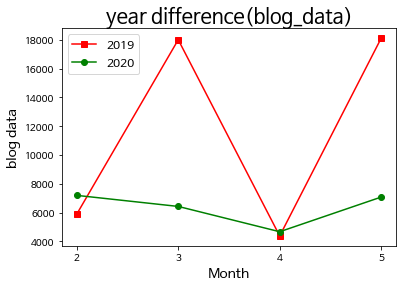

In [ ]:
# 사용법
diff_year_graph('블로그', '대구 수성구')
 #['뉴스', '블로그', '카페'], ['서울 중구', '서울 노원구', '대구 수성구', '대구 중구']

# 사용법 
diff_year_graph([숙박, 레저, 문화취미 의료기관 보건위생 요식업소], ['서울 중구', '서울 노원구', '대구 수성구', '대구 중구'])

In [ ]:


def diff_year_graph_posneg(kind,where):
    
    if where == '서울 중구':
        where = 140
    elif where == '서울 노원구':
        where = 350
    elif where ==  '대구 수성구':
        where = 260
    elif where == '대구 중구':
        where = 110
    elif where == 'all':
      pass
    else:
        print(''' "서울 중구", "서울 노원구", "대구 수성구", "대구 중구" 중 하나를 입력하세요''')
       
        
    if kind == '숙박':
        plt.figure(figsize = (20,10))
        plt.subplot(221)
        if where == 'all':
          n2019 = data[up1_pos_2019].sum()
          n2020 = data[up1_pos_2020].sum()
        else:
          n2019 = data[data['GU_CD'] == where][up1_pos_2019].sum()
          n2020 = data[data['GU_CD'] == where][up1_pos_2020].sum()
        plt.plot(['2','3','4','5'], n2019.values, marker='s', color='r')
        plt.plot(['2','3','4','5'], n2020.values, marker='o', color='g')

        plt.title('year difference(accomodation_pos_data)', fontsize=20) 
        plt.ylabel('pos data', fontsize=14)
        plt.xlabel('Month', fontsize=14)
        plt.legend(['2019', '2020'], fontsize=12, loc='best')
        
        plt.subplot(222)
        if where == 'all':
          n2019 = data[up1_neg_2019].sum()
          n2020 = data[up1_neg_2020].sum()
        else:
          n2019 = data[data['GU_CD'] == where][up1_neg_2019].sum()
          n2020 = data[data['GU_CD'] == where][up1_neg_2020].sum()
        plt.plot(['2','3','4','5'], n2019.values, marker='s', color='r')
        plt.plot(['2','3','4','5'], n2020.values, marker='o', color='g')

        plt.title('year difference(accomodation_neg_data)', fontsize=20) 
        plt.ylabel('neg data', fontsize=14)
        plt.xlabel('Month', fontsize=14)
        plt.legend(['2019', '2020'], fontsize=12, loc='best')
        plt.show()

               
        
    elif kind == '레저':
        plt.figure(figsize = (20,10))
        plt.subplot(221)
        if where == 'all':
          n2019 = data[up2_pos_2019].sum()
          n2020 = data[up2_pos_2020].sum()
        else:
          n2019 = data[data['GU_CD'] == where][up2_pos_2019].sum()
          n2020 = data[data['GU_CD'] == where][up2_pos_2020].sum()
        plt.plot(['2','3','4','5'], n2019.values, marker='s', color='r')
        plt.plot(['2','3','4','5'], n2020.values, marker='o', color='g')

        plt.title('year difference(leisure_pos_data)', fontsize=20) 
        plt.ylabel('pos data', fontsize=14)
        plt.xlabel('Month', fontsize=14)
        plt.legend(['2019', '2020'], fontsize=12, loc='best')
        
        plt.subplot(222)
        if where == 'all':
          n2019 = data[up2_neg_2019].sum()
          n2020 = data[up2_neg_2020].sum()
        else:
          n2019 = data[data['GU_CD'] == where][up2_neg_2019].sum()
          n2020 = data[data['GU_CD'] == where][up2_neg_2020].sum()
        plt.plot(['2','3','4','5'], n2019.values, marker='s', color='r')
        plt.plot(['2','3','4','5'], n2020.values, marker='o', color='g')

        plt.title('year difference(leisure_neg_data)', fontsize=20) 
        plt.ylabel('neg data', fontsize=14)
        plt.xlabel('Month', fontsize=14)
        plt.legend(['2019', '2020'], fontsize=12, loc='best')
        plt.show()

    elif kind == '의료기관':
        plt.figure(figsize = (20,10))
        plt.subplot(221)
        if where == 'all':
          n2019 = data[up4_pos_2019].sum()
          n2020 = data[up4_pos_2020].sum()
        else:
          n2019 = data[data['GU_CD'] == where][up4_neg_2019].sum()
          n2020 = data[data['GU_CD'] == where][up4_neg_2020].sum()
        plt.plot(['2','3','4','5'], n2019.values, marker='s', color='r')
        plt.plot(['2','3','4','5'], n2020.values, marker='o', color='g')

        plt.title('year difference(Medical_pos_data)', fontsize=20) 
        plt.ylabel('pos data', fontsize=14)
        plt.xlabel('Month', fontsize=14)
        plt.legend(['2019', '2020'], fontsize=12, loc='best')
        
        plt.subplot(222)
        if where == 'all':
          n2019 = data[up4_neg_2019].sum()
          n2020 = data[up4_neg_2020].sum()
        else:
          n2019 = data[data['GU_CD'] == where][up4_neg_2019].sum()
          n2020 = data[data['GU_CD'] == where][up4_neg_2020].sum()
        plt.plot(['2','3','4','5'], n2019.values, marker='s', color='r')
        plt.plot(['2','3','4','5'], n2020.values, marker='o', color='g')

        plt.title('year difference(Medical_neg_data)', fontsize=20) 
        plt.ylabel('neg data', fontsize=14)
        plt.xlabel('Month', fontsize=14)
        plt.legend(['2019', '2020'], fontsize=12, loc='best')
        plt.show()

    elif kind == '문화취미':
        plt.figure(figsize = (20,10))
        plt.subplot(221)
        if where == 'all':
          n2019 = data[up3_pos_2019].sum()
          n2020 = data[up3_pos_2020].sum()
        else:
          n2019 = data[data['GU_CD'] == where][up3_pos_2019].sum()
          n2020 = data[data['GU_CD'] == where][up3_pos_2020].sum()
        plt.plot(['2','3','4','5'], n2019.values, marker='s', color='r')
        plt.plot(['2','3','4','5'], n2020.values, marker='o', color='g')

        plt.title('year difference(culture hobby_pos_data)', fontsize=20) 
        plt.ylabel('pos data', fontsize=14)
        plt.xlabel('Month', fontsize=14)
        plt.legend(['2019', '2020'], fontsize=12, loc='best')
        
        plt.subplot(222)
        if where == 'all':
          n2019 = data[up3_neg_2019].sum()
          n2020 = data[up3_neg_2020].sum()
        else:
          n2019 = data[data['GU_CD'] == where][up3_neg_2019].sum()
          n2020 = data[data['GU_CD'] == where][up3_neg_2020].sum()
        plt.plot(['2','3','4','5'], n2019.values, marker='s', color='r')
        plt.plot(['2','3','4','5'], n2020.values, marker='o', color='g')

        plt.title('year difference(culture hobbye_neg_data)', fontsize=20) 
        plt.ylabel('neg data', fontsize=14)
        plt.xlabel('Month', fontsize=14)
        plt.legend(['2019', '2020'], fontsize=12, loc='best')
        plt.show()
        
    elif kind == '보건위생':
        plt.figure(figsize = (20,10))
        plt.subplot(221)
        
        if where == 'all':
          n2019 = data[up5_pos_2019].sum()
          n2020 = data[up5_pos_2020].sum()
        else:
          n2019 = data[data['GU_CD'] == where][up5_pos_2019].sum()
          n2020 = data[data['GU_CD'] == where][up5_pos_2020].sum()
        plt.plot(['2','3','4','5'], n2019.values, marker='s', color='r')
        plt.plot(['2','3','4','5'], n2020.values, marker='o', color='g')

        plt.title('year difference(health-hygiene_pos_data)', fontsize=20) 
        plt.ylabel('pos data', fontsize=14)
        plt.xlabel('Month', fontsize=14)
        plt.legend(['2019', '2020'], fontsize=12, loc='best')
        
        plt.subplot(222)
        if where == 'all':
          n2019 = data[up5_neg_2019].sum()
          n2020 = data[up5_neg_2020].sum()
        else:
          n2019 = data[data['GU_CD'] == where][up5_neg_2019].sum()
          n2020 = data[data['GU_CD'] == where][up5_neg_2020].sum()
        plt.plot(['2','3','4','5'], n2019.values, marker='s', color='r')
        plt.plot(['2','3','4','5'], n2020.values, marker='o', color='g')

        plt.title('year difference(health-hygiene_neg_data)', fontsize=20) 
        plt.ylabel('neg data', fontsize=14)
        plt.xlabel('Month', fontsize=14)
        plt.legend(['2019', '2020'], fontsize=12, loc='best')
        plt.show()   
        
    elif kind == '요식업소':
        plt.figure(figsize = (20,10))
        plt.subplot(221)
        if where == 'all':
          n2019 = data[up6_pos_2019].sum()
          n2020 = data[up6_pos_2020].sum()
        else:
          n2019 = data[data['GU_CD'] == where][up6_pos_2019].sum()
          n2020 = data[data['GU_CD'] == where][up6_pos_2020].sum()
        plt.plot(['2','3','4','5'], n2019.values, marker='s', color='r')
        plt.plot(['2','3','4','5'], n2020.values, marker='o', color='g')

        plt.title('year difference(catering_pos_data)', fontsize=20) 
        plt.ylabel('pos data', fontsize=14)
        plt.xlabel('Month', fontsize=14)
        plt.legend(['2019', '2020'], fontsize=12, loc='best')
        
        plt.subplot(222)
        if where == 'all':
          n2019 = data[up6_neg_2019].sum()
          n2020 = data[up6_neg_2020].sum()
        else:
          n2019 = data[data['GU_CD'] == where][up6_neg_2019].sum()
          n2020 = data[data['GU_CD'] == where][up6_neg_2020].sum()
        plt.plot(['2','3','4','5'], n2019.values, marker='s', color='r')
        plt.plot(['2','3','4','5'], n2020.values, marker='o', color='g')

        plt.title('year difference(catering_neg_data)', fontsize=20) 
        plt.ylabel('neg data', fontsize=14)
        plt.xlabel('Month', fontsize=14)
        plt.legend(['2019', '2020'], fontsize=12, loc='best')
        plt.show()           

    

## 숙박

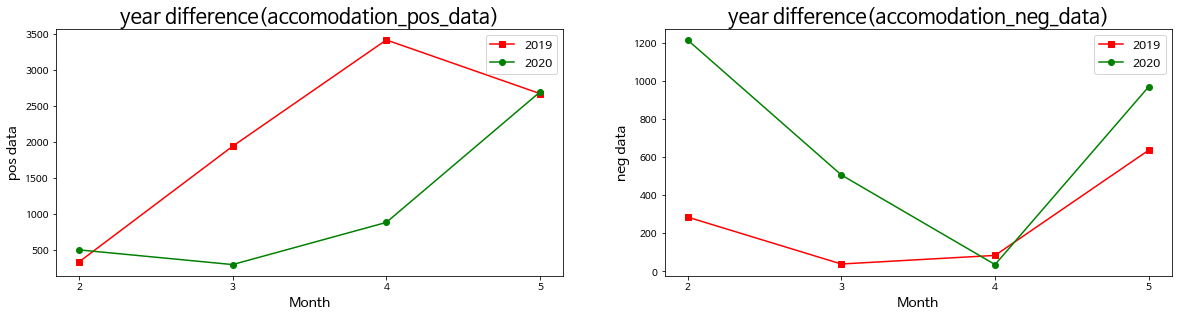

In [ ]:
diff_year_graph_posneg('숙박',"all")

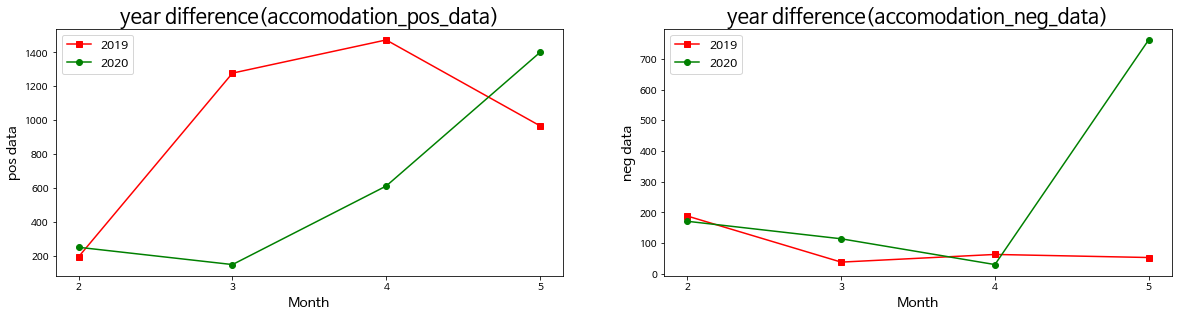

In [ ]:
#diff_year_graph([숙박, 레저, 문화취미 의료기관 보건위생 요식업소], ['서울 중구', '서울 노원구', '대구 수성구', '대구 중구'])
diff_year_graph_posneg('숙박',"서울 중구")

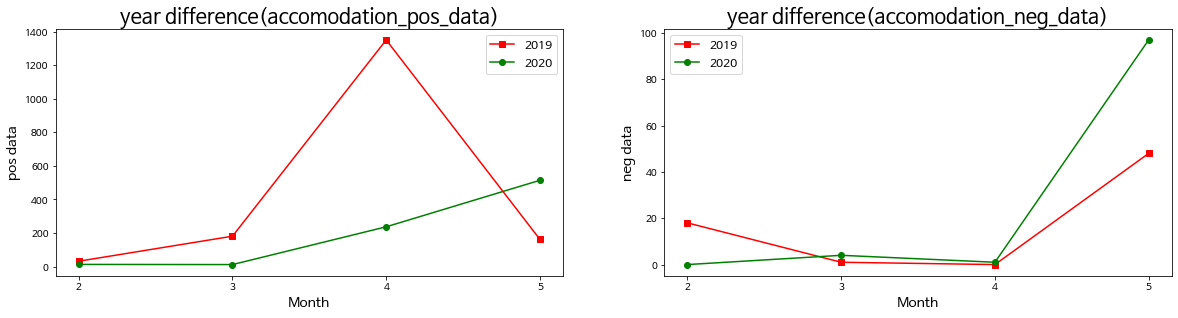

In [ ]:
diff_year_graph_posneg('숙박',"서울 노원구")

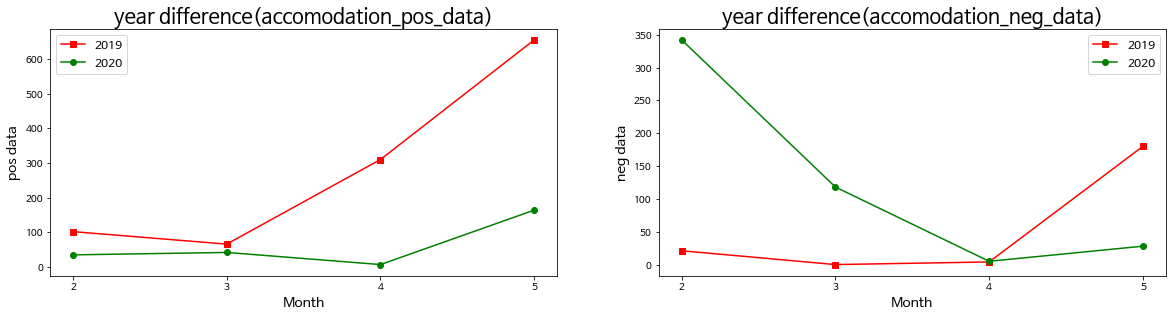

In [ ]:
diff_year_graph_posneg('숙박',"대구 중구")

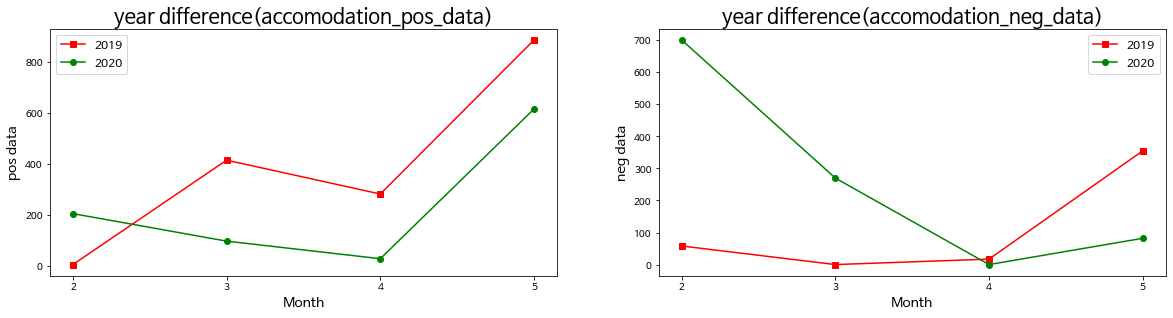

In [ ]:
diff_year_graph_posneg('숙박',"대구 수성구")

## 레저

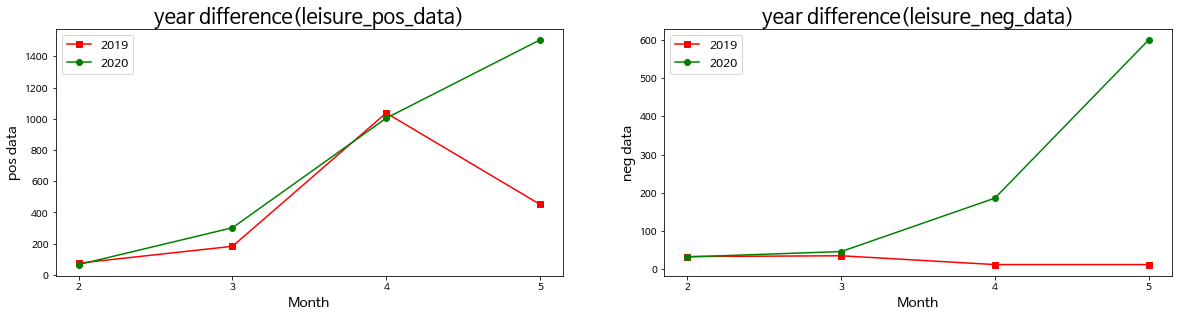

In [ ]:
diff_year_graph_posneg('레저',"all")

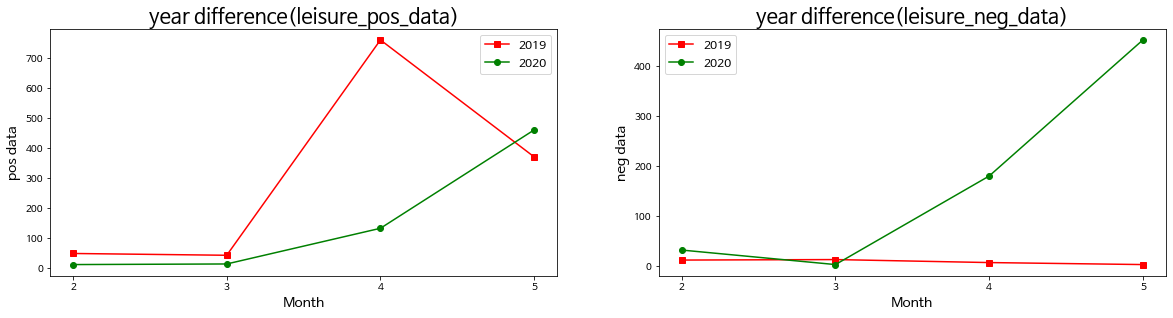

In [ ]:
diff_year_graph_posneg('레저',"서울 중구")

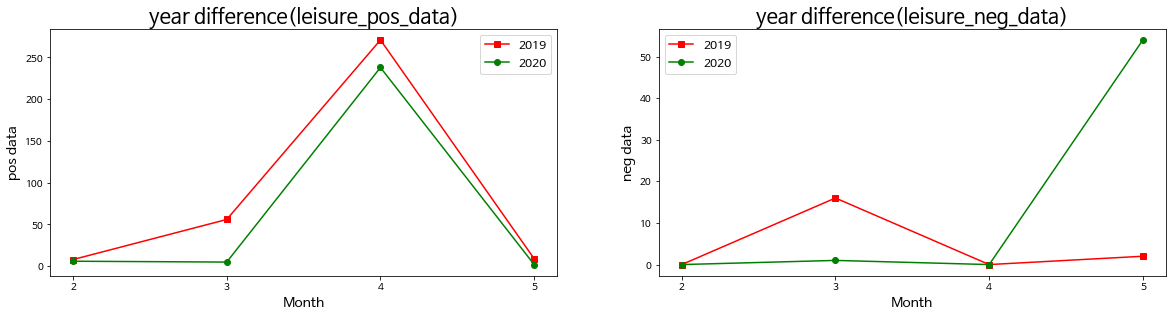

In [ ]:
diff_year_graph_posneg('레저',"서울 노원구")

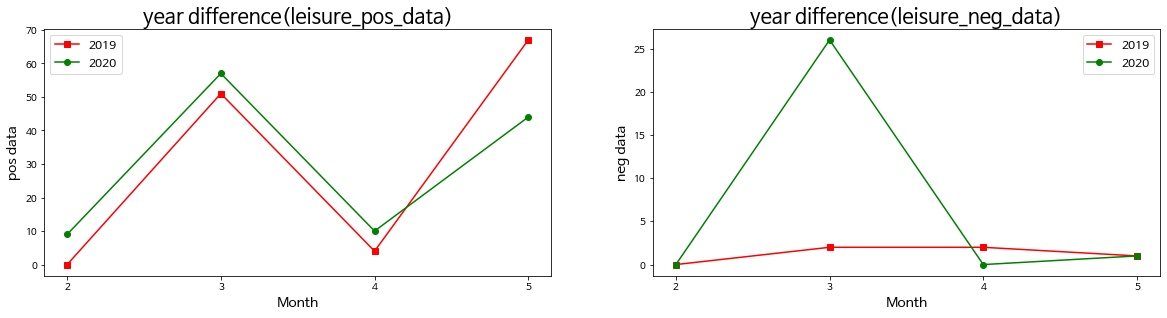

In [ ]:
diff_year_graph_posneg('레저',"대구 중구")

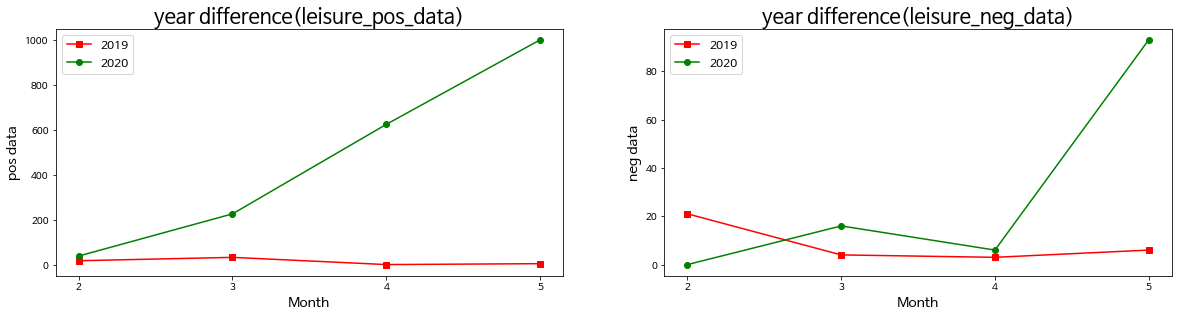

In [ ]:
diff_year_graph_posneg('레저',"대구 수성구")

## 문화취미

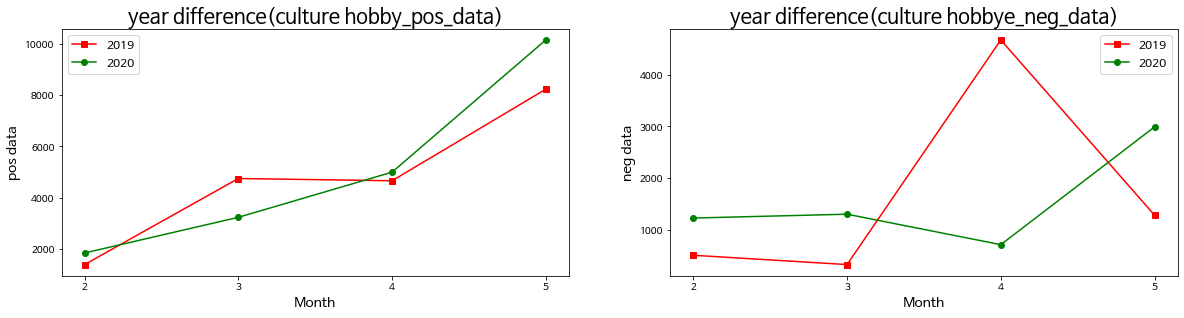

In [ ]:
diff_year_graph_posneg('문화취미',"all")

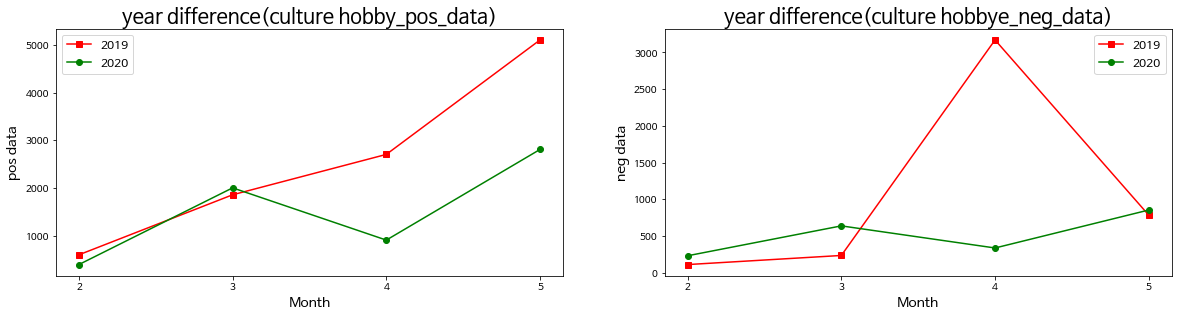

In [ ]:
#diff_year_graph([숙박, 레저, 문화취미 의료기관 보건위생 요식업소], ['서울 중구', '서울 노원구', '대구 수성구', '대구 중구'])
diff_year_graph_posneg('문화취미',"서울 중구")

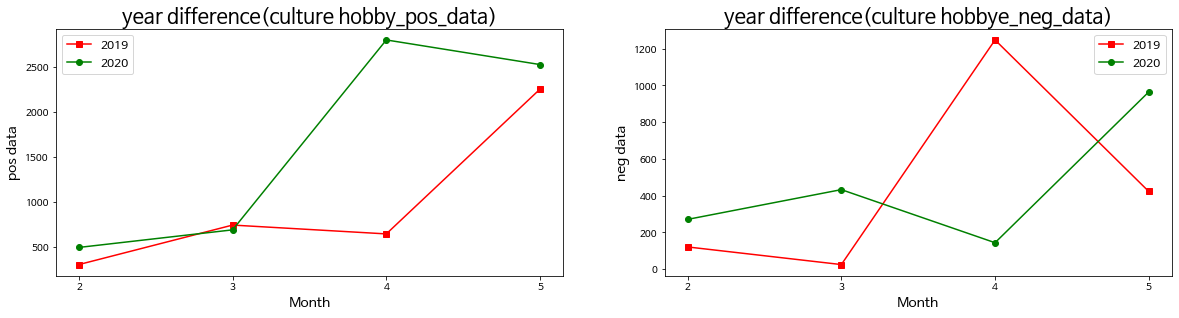

In [ ]:
diff_year_graph_posneg('문화취미',"서울 노원구")

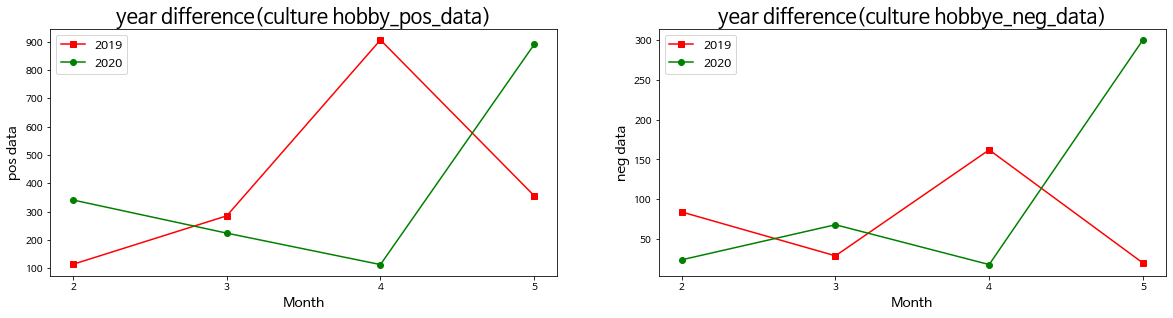

In [ ]:
diff_year_graph_posneg('문화취미',"대구 중구")

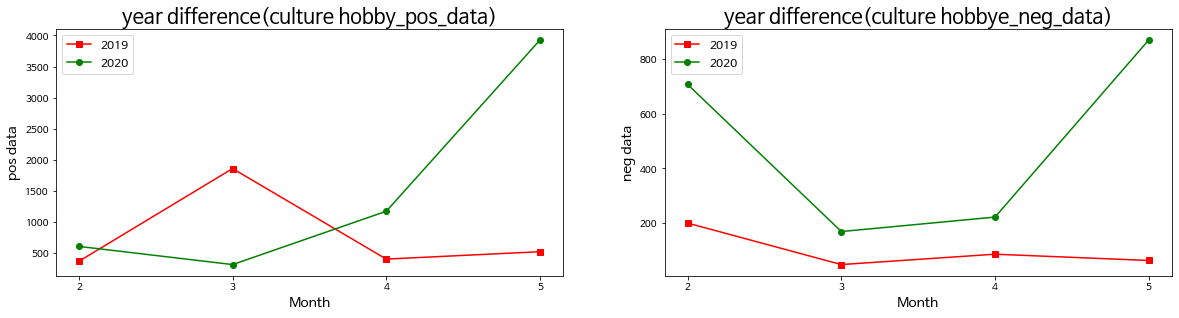

In [ ]:
diff_year_graph_posneg('문화취미',"대구 수성구")

## 의료기관

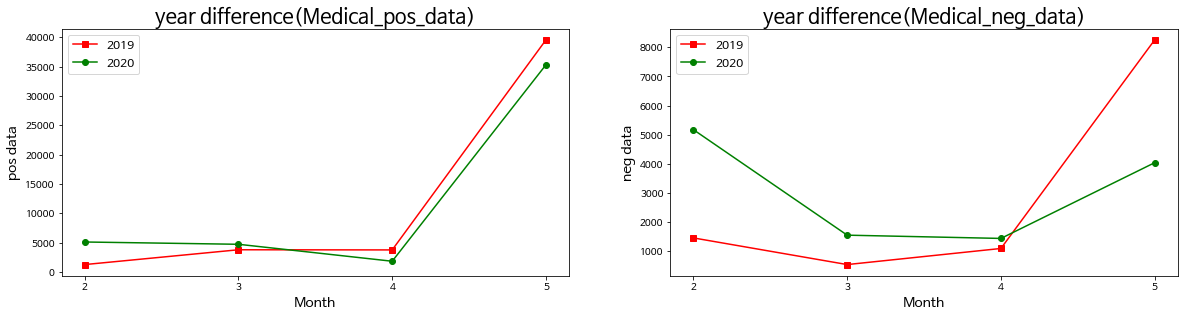

In [ ]:
#diff_year_graph([숙박, 레저, 문화취미 의료기관 보건위생 요식업소], ['서울 중구', '서울 노원구', '대구 수성구', '대구 중구'])
diff_year_graph_posneg('의료기관',"all")

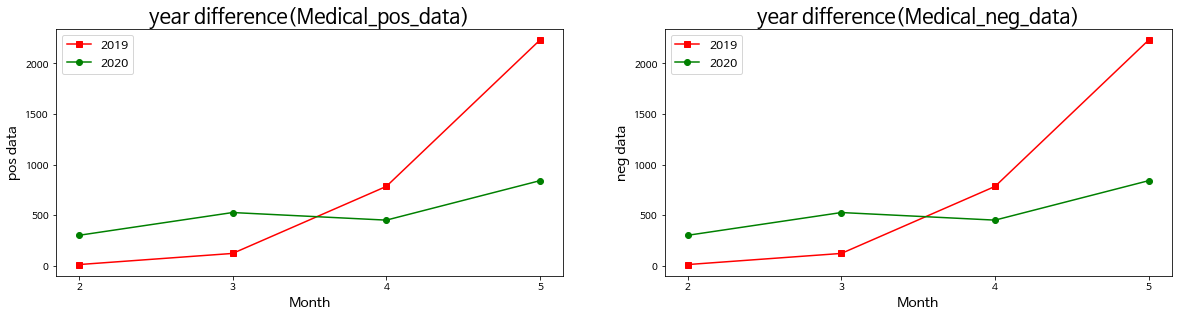

In [ ]:
#diff_year_graph([숙박, 레저, 문화취미 의료기관 보건위생 요식업소], ['서울 중구', '서울 노원구', '대구 수성구', '대구 중구'])
diff_year_graph_posneg('의료기관',"서울 중구")

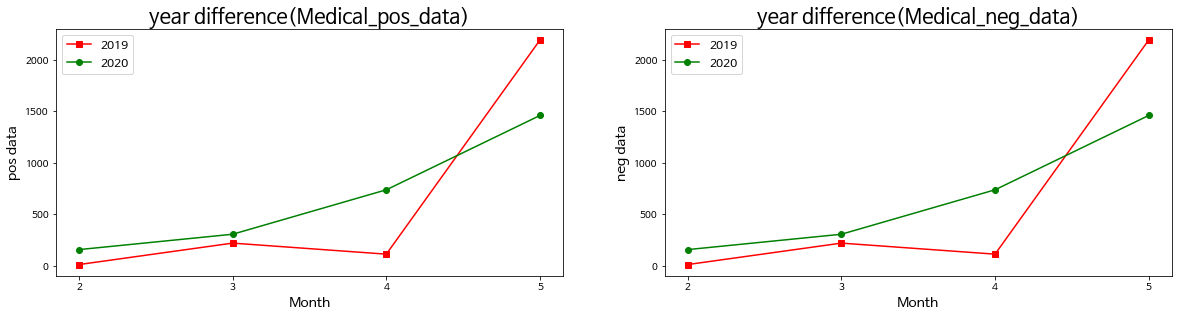

In [ ]:
diff_year_graph_posneg('의료기관',"서울 노원구")

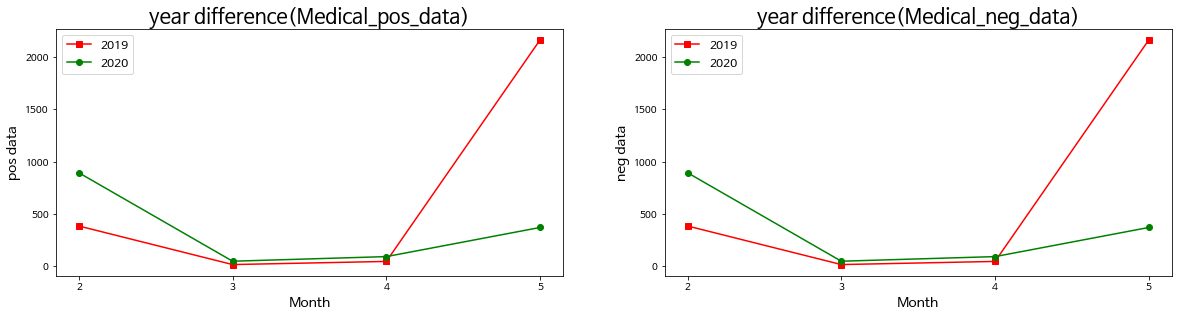

In [ ]:
diff_year_graph_posneg('의료기관',"대구 중구")

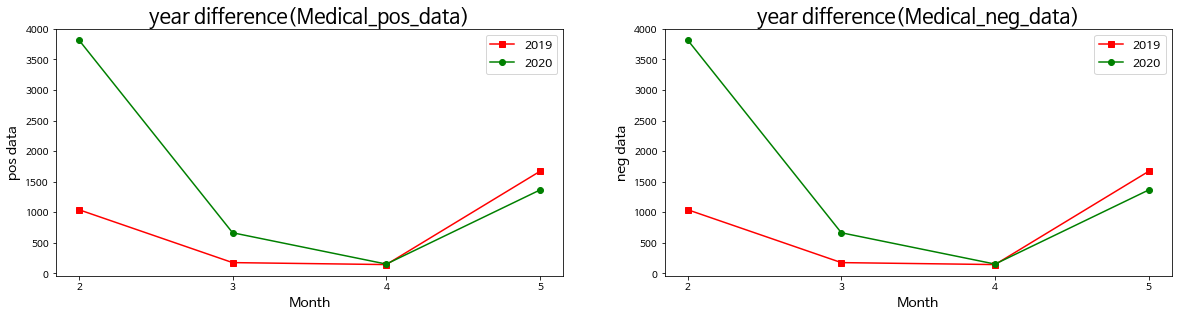

In [ ]:
diff_year_graph_posneg('의료기관',"대구 수성구")

## 보건위생

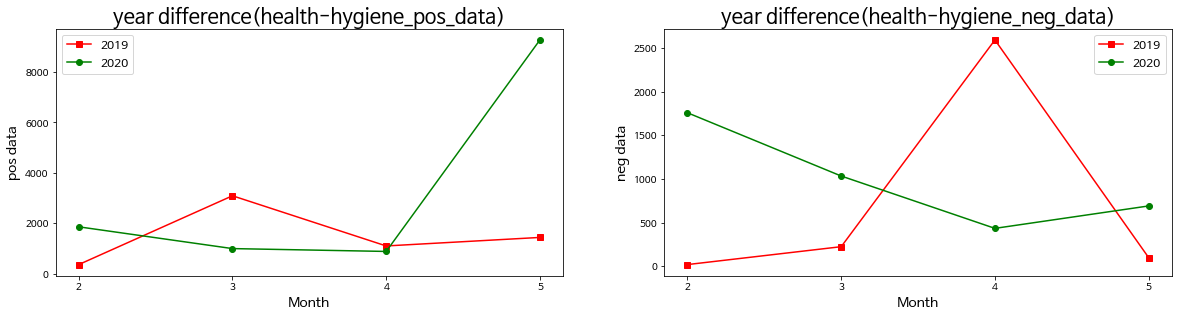

In [ ]:
#diff_year_graph([숙박, 레저, 문화취미 의료기관 보건위생 요식업소], ['서울 중구', '서울 노원구', '대구 수성구', '대구 중구'])
diff_year_graph_posneg('보건위생',"all")

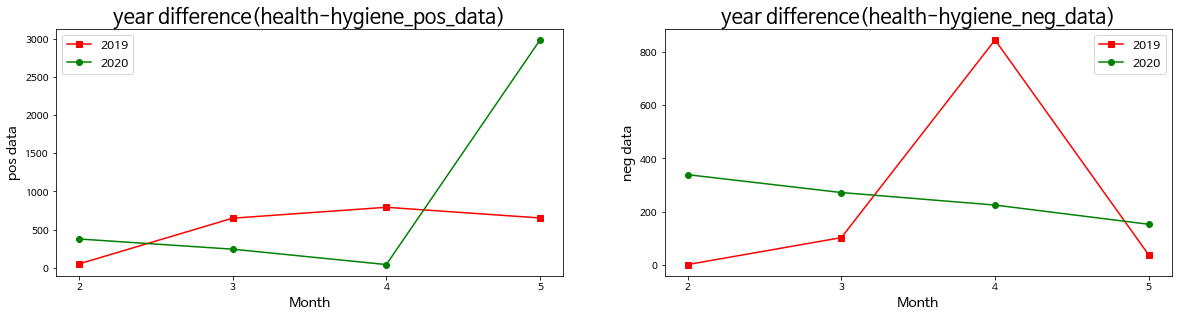

In [ ]:
#diff_year_graph([숙박, 레저, 문화취미 의료기관 보건위생 요식업소], ['서울 중구', '서울 노원구', '대구 수성구', '대구 중구'])
diff_year_graph_posneg('보건위생',"서울 중구")

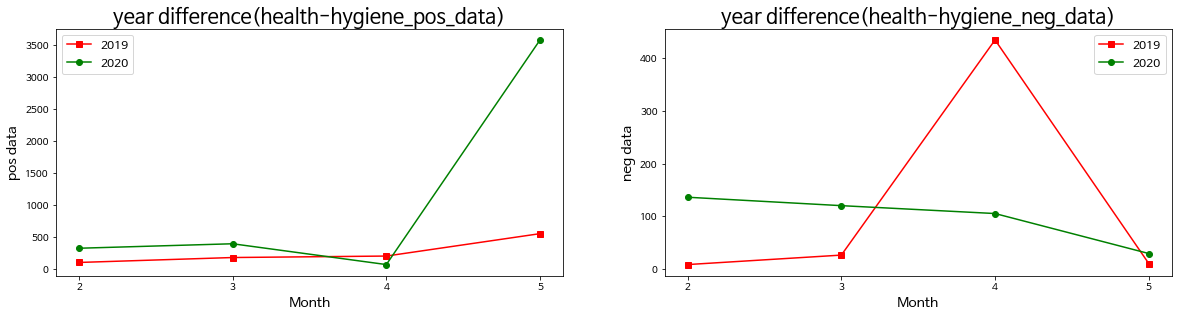

In [ ]:
diff_year_graph_posneg('보건위생',"서울 노원구")

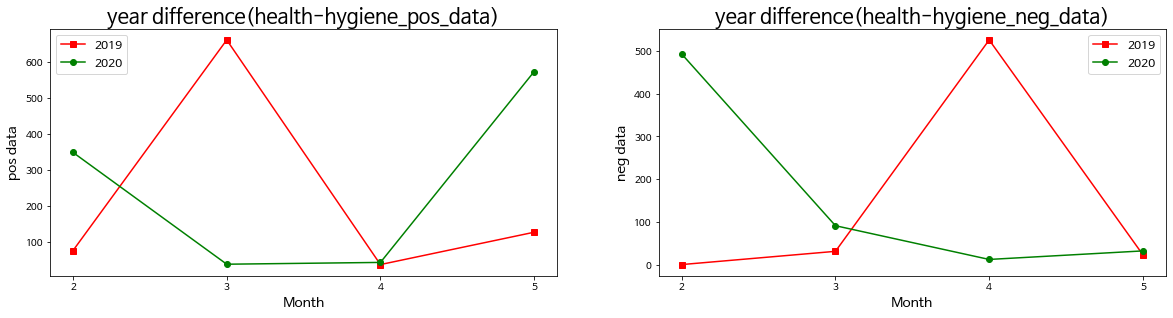

In [ ]:
diff_year_graph_posneg('보건위생',"대구 중구")

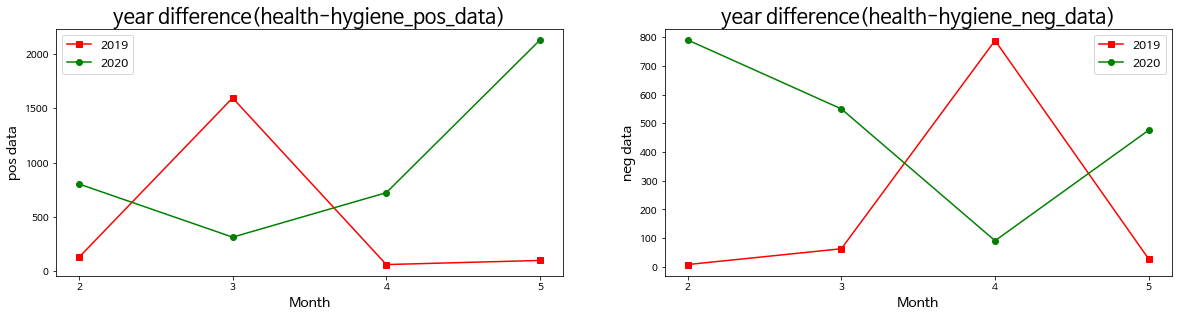

In [ ]:
diff_year_graph_posneg('보건위생',"대구 수성구")

## 요식업소

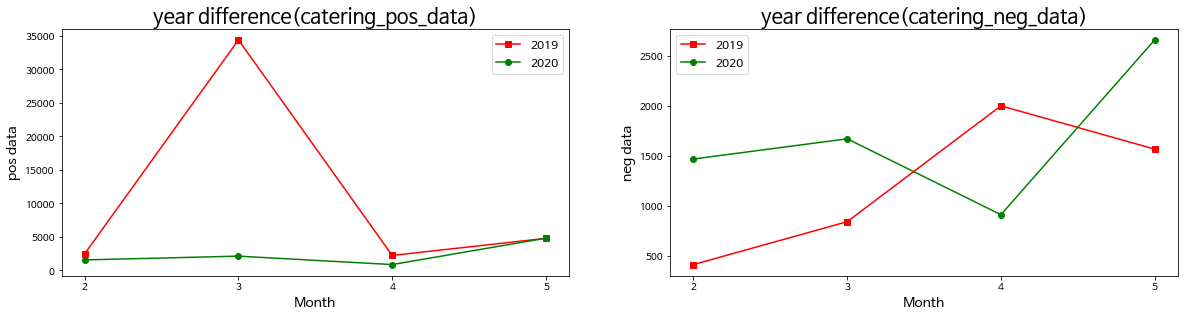

In [ ]:
#diff_year_graph([숙박, 레저, 문화취미 의료기관 보건위생 요식업소], ['서울 중구', '서울 노원구', '대구 수성구', '대구 중구'])
diff_year_graph_posneg('요식업소',"all")

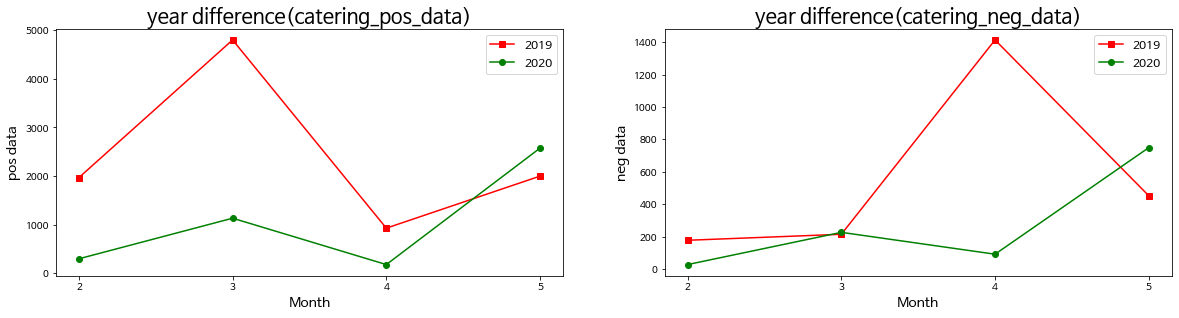

In [ ]:
#diff_year_graph([숙박, 레저, 문화취미 의료기관 보건위생 요식업소], ['서울 중구', '서울 노원구', '대구 수성구', '대구 중구'])
diff_year_graph_posneg('요식업소',"서울 중구")

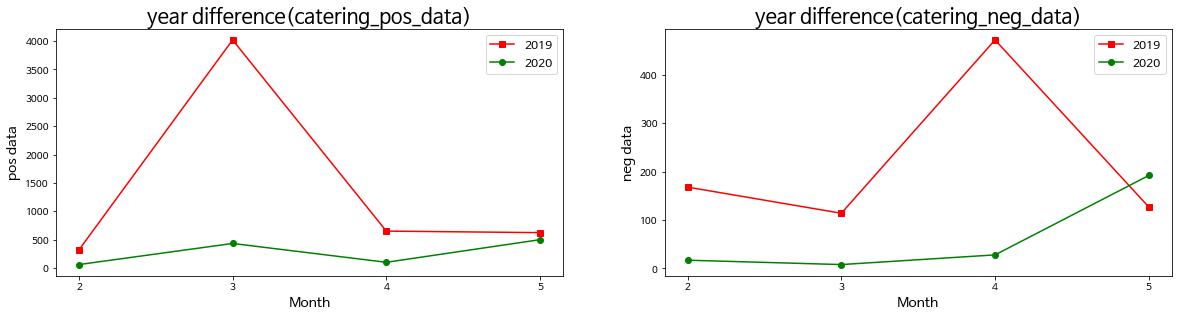

In [ ]:
diff_year_graph_posneg('요식업소',"서울 노원구")

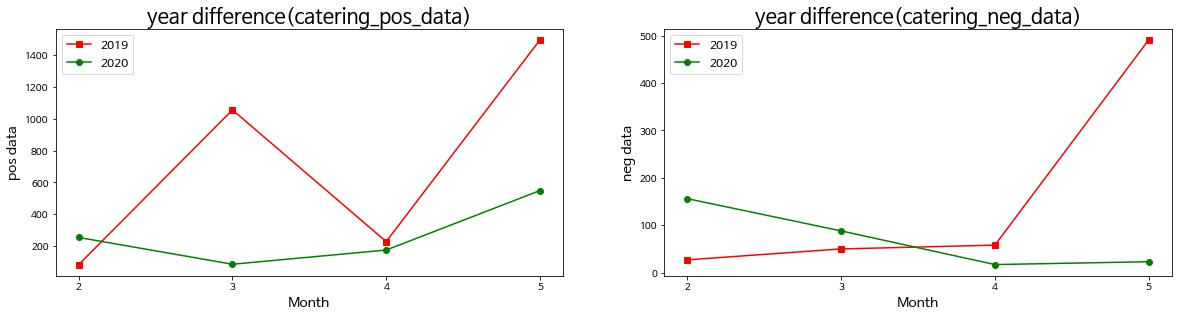

In [ ]:
diff_year_graph_posneg('요식업소',"대구 중구")

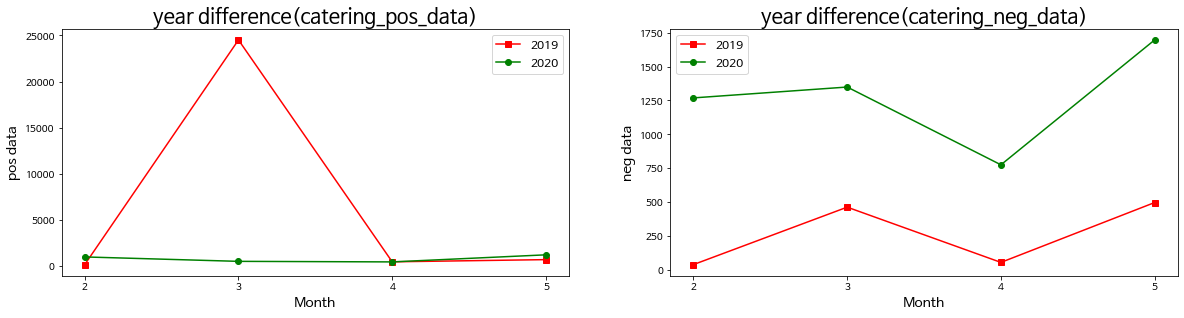

In [ ]:
diff_year_graph_posneg('요식업소',"대구 수성구")

In [ ]:
topics2019 = ['UP_TOPIC_201902', 'UP_TOPIC_201903', 'UP_TOPIC_201904', 'UP_TOPIC_201905']
topics2020 = ['UP_TOPIC_202002', 'UP_TOPIC_202003', 'UP_TOPIC_202004', 'UP_TOPIC_202005']
topics_all = ['GU_NM(삭제)','UP_TOPIC_201902', 'UP_TOPIC_201903', 'UP_TOPIC_201904', 'UP_TOPIC_201905','UP_TOPIC_202002', 'UP_TOPIC_202003', 'UP_TOPIC_202004', 'UP_TOPIC_202005']

In [ ]:
data[topics2019]# 2019년 화제어 데이터 동별로 나뉘어 있고, 구 별로 묶을 수 있음

,UP_TOPIC_201902,UP_TOPIC_201903,UP_TOPIC_201904,UP_TOPIC_201905
0,"장관,기념식,창간,롯데호텔,뷔페","총동창회,서울대,박물관,월드비전,프로그램","기생충,반민특위,강원도,이재민,푯돌","동계올림픽,은퇴,여제,기자회견,눈물"
1,"회현동,서울역,도시재생,윤동주,일제강점기","남산,케이블카,남산둘레길,국립극장,남산타워","서울지방경찰청,경복궁역,종교교회,용비어천가,종로구","저작권,녹색교통지역,기부채납,최고,인지"
2,"생활유산,열쇠고리,신세계백화점,리뉴얼,관광객","문화재,도시재생사업,을지로,등록문화재,보존","반민특위,푯돌,충무로,생활형숙박시설,하늘N","중구,문화예술인,문화도시,쓰레기,미화원"
3,"저작권,영남상생포럼,자유한국장,지적,그랜드호텔","저작권,다가구주택,주주총회,주식회사,보증금","저작권,등록,기간,매각,유산","비용,주소,등록,신용불량자,유산"
4,"빵집,태극당,신라호텔,세관,감사원","프로포폴,호텔신라,이부진,투약,불법","신부,예비신랑,신라호텔,대학병원,결혼식","덴마크,왕세자,명예시민증,왕세자비,신라호텔"
5,"식후경,안내,잘루스,맛집,리스트","도심권,지역분석,부동산,투자,몽골한국신문","조건,몽골한국신문,한인소식,노선,안내","중고,차량,경매,할부,사업자"
6,"창업,맛집,부동산,주택,철거","거처,도시,거주자,다가구주택,보증금","약수역,오피스텔,택시요금,분양,이사","한양도성,호텔,신당동,근린생활시설,매물"
7,"성곽마을,장관,기념식,리모델링,활성화구역","도서관,서양호,참여예산,구청장,손기정도서관","광희동주민센터,남산건강,한옥마을,광희문,다산성곽길","운동전도사,보건지소,참여형,응봉공원,주택신축"
8,"충무아트센터,신년포럼,중구청소년수련관,신년인사,서양호","리스,행운보금자리,산업단지,동산,인지","독립유공자,가족들,후손들,기념촬영,퇴계로입구","보건의료원,무료돌봄,문자,가로수길,성벽"
9,"서양호,전수조사,충무아트센터,자유토론,신년포럼","구청장,설명회,구민들,주민센터,주민설명회","신당동,눈물,부모님,이사장,한옥마을","문화예술인,공간,르네상스,문화도시,창작"


In [ ]:
data[topics2020]# 2020년 화제어 데이터 동별로 나뉘어 있고, 구 별로 묶을 수 있음

,UP_TOPIC_202002,UP_TOPIC_202003,UP_TOPIC_202004,UP_TOPIC_202005
0,"롯데백화점,마포공덕점,프레지던트호텔,코로나바이러스,확진자","직원,롯데호텔,콜센터,코로나,확진자","도시계획위원회,정비계획,재개발구역,서소문,정비수법","창조인상,생명과학부,예술감독,코로나19,RNA"
1,"남산,남촌,중림,고도제한,개발제한","코로나19,남산둘레길,기부 행렬,랜드마크,남녀노소","코로나19,구조조정,산업단지,원장,각하","시민아파트,시범아파트,서울시장,충정아파트,회현"
2,"롯데백화점,코로나바이러스감염증,관광객,소상공인,확진자","확진자,중구,코로나,숙박시설,중국인","학원,코로나,확진자,집단감염,유흥업소","마스크,선별진료소,면마스크,천마스크,확진환자"
3,"인테리어,도배장판,업체,거실,비용","케이블카,남산둘레길,남산타워,국립극장,남산","코로나,업종,감소율,자영업자,재난","코로나19,본점,주류,리스,양도"
4,"호텔신라,한옥호텔,착공,전통호텔,도시계획위원회","호텔신라,이부진,신라면세점,신라호텔,착공","코로나,업종,감소율,자영업자,재난","코로나,신세계조선호텔,브랜드,한옥호텔,특급호텔"
5,"코로나바이러스감염증,확진자,동선,경과,수유인테리어업체","몽골,몽골인,원나라,울란바토르,몽골문화경제원","코로나,업종,감소율,자영업자,재난","코로나19,증발,관광,노란버스,준공청소"
6,"리스트,추천,통일교회사,역세권,신당역","신천지예수교,이단,명단,목록,정리","호캉스,분양,임대,역세권,보증금","주거단지,원룸,분양,담보,양도"
7,"신라면세점,이발소,어르신,봉사,환원","위장교회,복음방,위장문화센터,신천지,다산동","입주청소,이사청소,쇼핑몰,리플렛,장노년일자리지원센터","숭례문,남산,성곽,한양도성,광희문"
8,"약수역,골목상권,중구청,금리단길,클린존","약수동,헌혈,마스크,재난문자,골목","노후간판,클린코디네이터,선거지원,심은하,약수동","코로나19,이태원,클럽,전국택배연대노동조합원들,유흥업소"
9,"청구동,세배정치,큰절,정치자금,세배","청구동,국회의원,총선,공적마스크,약국","코로나19,투표소,여성안심귀갓길,안심불빛,112","중구,확진자,유흥업소,이태원,코로나19"


In [ ]:
topics_all=data[topics_all]

In [ ]:
# 구로 통합하기 전에 구분자 넣어줌
topics_all=topics_all.apply(lambda x : x+',')

In [ ]:
GU_topics=topics_all.groupby('GU_NM(삭제)').sum().reset_index()

In [ ]:
GU_topics['SI_NM']=GU_topics['GU_NM(삭제)'].apply(lambda x : x[:2])

In [ ]:
SI_topics=GU_topics.groupby('SI_NM').sum().reset_index()

In [ ]:
GU_topics=GU_topics[['GU_NM(삭제)','UP_TOPIC_201902', 'UP_TOPIC_201903', 'UP_TOPIC_201904', 'UP_TOPIC_201905','UP_TOPIC_202002', 'UP_TOPIC_202003', 'UP_TOPIC_202004', 'UP_TOPIC_202005']]
GU_topics.columns=['GU_NM','UP_TOPIC_201902', 'UP_TOPIC_201903', 'UP_TOPIC_201904', 'UP_TOPIC_201905','UP_TOPIC_202002', 'UP_TOPIC_202003', 'UP_TOPIC_202004', 'UP_TOPIC_202005']
SI_topics=SI_topics[['SI_NM','UP_TOPIC_201902', 'UP_TOPIC_201903', 'UP_TOPIC_201904', 'UP_TOPIC_201905','UP_TOPIC_202002', 'UP_TOPIC_202003', 'UP_TOPIC_202004', 'UP_TOPIC_202005']]

In [ ]:
ALL_topics=SI_topics.sum()
ALL_topics=pd.DataFrame(ALL_topics).T
ALL_topics=ALL_topics[['UP_TOPIC_201902', 'UP_TOPIC_201903', 'UP_TOPIC_201904', 'UP_TOPIC_201905','UP_TOPIC_202002', 'UP_TOPIC_202003', 'UP_TOPIC_202004', 'UP_TOPIC_202005']]

In [ ]:
GU_topics

,GU_NM,UP_TOPIC_201902,UP_TOPIC_201903,UP_TOPIC_201904,UP_TOPIC_201905,UP_TOPIC_202002,UP_TOPIC_202003,UP_TOPIC_202004,UP_TOPIC_202005
0,"대구 수성구,","고령성주칠곡,정치자금법,자유한국당,영남상생포럼,그랜드호텔,중기중앙회,아양아트센터,아...","오피스텔,수성시장역,전세임차권,랜드마크,두산위브,대구경부지구회,군국가요,아트도서관,...","범어공원,사유지,도시공원,대구환경운동연합,공원구역,대한적십자사,보강병원,봉산문화회관...","음주운전,범어네거리,상가,아파트,푸르지오,투숙객,별관,국립과학수사연구원,경찰관계자,...","확진자,코로나19,음압병실,청정지역,폐렴,확진자,코로나19,신천지,어린이집,격리,코...","코로나19,플래티넘,쌍용,확진자,견본주택,코로나19,현대엔지니어링,주상복합,중앙방역...","쌍용,플래티넘,코로나19,전용면적,경쟁률,미래통합당,더불어민주당,코로나19,현대엔지...","코로나19,확진자,주거시설,학부모,금감원장,이용수,정의기억연대,위안부,윤미향,더불어..."
1,"대구 중구,","소녀상,위안부,국채보상운동기념공원,아트스페이스,두류정수장,민간위탁,도서관,공공도서관...","민간위탁,도서관,중구청,도심재생문화재단,도시환경위원회,경북대병원,민간위탁,어린이,도...","대구국제마라톤대회,국채보상운동,국제육상경기연맹,신청사,식목일,버닝썬,라이브카페,소규...","석류꽃,리사이클센터,도심재생문화재단,경북대병원,국립대병원,파견용역노동자,국립대병원,...","응급실,코로나,특별재난지역,마스크,신천지,코로나,응급실,폐쇄,경북대병원,자가격리,신...","코로나,드론,방역,서문시장,확진자,코로나,공무원,드론,의료진,대구동산병원,지역아동센...","안심음식점,투표,확진자,위생방역물품,긴급재난지원금,코로나,손님,백화점,대구경북연구원...","집합금지,코로나,방역,긴급구제,유흥시설,원내대표,미래통합당,개별공시지가,삼덕동,코로..."
2,"서울 노원구,","노원구청장,노원구,도봉운전면허시험장,불암산,힐링타운,플레이스,해링턴,태릉,서울경제,...","광운대,불암산,체육관,국비30억,구청장,수영장,확충지원,아침체조교실,기공체조,태릉효...","보합세,전용다리,학여울청구아파트,강남,연장교량,무순위,청약,아파트,견본주택,역세권,...","광운대역세권,코레일,경춘선,군사분계선,구청장,서울대학교,경춘선숲길,서울과학기술대학교...","상승폭,광운대역세권,코레일,풍선효과,코로나19,돗가비,코로나19,확진자,주거환경,자...","부동산,풍선효과,퇴근길,무빙워크,손잡이,우체국,다세대,경기권,자연조건,헛걸음,강북,...","급매물,낙찰가,하락세,감정가,사전협상,장기미집행,도시공원,도시자연공원구역,주택,경매...","아파트,성폭행,코로나19,확진자,노원구,보행약자,경춘선,운동량,따릉이,감염,코로나1..."
3,"서울 중구,","장관,기념식,창간,롯데호텔,뷔페,회현동,서울역,도시재생,윤동주,일제강점기,생활유산,...","총동창회,서울대,박물관,월드비전,프로그램,남산,케이블카,남산둘레길,국립극장,남산타워...","기생충,반민특위,강원도,이재민,푯돌,서울지방경찰청,경복궁역,종교교회,용비어천가,종로...","동계올림픽,은퇴,여제,기자회견,눈물,저작권,녹색교통지역,기부채납,최고,인지,중구,문...","롯데백화점,마포공덕점,프레지던트호텔,코로나바이러스,확진자,남산,남촌,중림,고도제한,...","직원,롯데호텔,콜센터,코로나,확진자,코로나19,남산둘레길,기부 행렬,랜드마크,남녀노...","도시계획위원회,정비계획,재개발구역,서소문,정비수법,코로나19,구조조정,산업단지,원장...","창조인상,생명과학부,예술감독,코로나19,RNA,시민아파트,시범아파트,서울시장,충정아..."


In [ ]:
SI_topics

,SI_NM,UP_TOPIC_201902,UP_TOPIC_201903,UP_TOPIC_201904,UP_TOPIC_201905,UP_TOPIC_202002,UP_TOPIC_202003,UP_TOPIC_202004,UP_TOPIC_202005
0,대구,"고령성주칠곡,정치자금법,자유한국당,영남상생포럼,그랜드호텔,중기중앙회,아양아트센터,아...","오피스텔,수성시장역,전세임차권,랜드마크,두산위브,대구경부지구회,군국가요,아트도서관,...","범어공원,사유지,도시공원,대구환경운동연합,공원구역,대한적십자사,보강병원,봉산문화회관...","음주운전,범어네거리,상가,아파트,푸르지오,투숙객,별관,국립과학수사연구원,경찰관계자,...","확진자,코로나19,음압병실,청정지역,폐렴,확진자,코로나19,신천지,어린이집,격리,코...","코로나19,플래티넘,쌍용,확진자,견본주택,코로나19,현대엔지니어링,주상복합,중앙방역...","쌍용,플래티넘,코로나19,전용면적,경쟁률,미래통합당,더불어민주당,코로나19,현대엔지...","코로나19,확진자,주거시설,학부모,금감원장,이용수,정의기억연대,위안부,윤미향,더불어..."
1,서울,"노원구청장,노원구,도봉운전면허시험장,불암산,힐링타운,플레이스,해링턴,태릉,서울경제,...","광운대,불암산,체육관,국비30억,구청장,수영장,확충지원,아침체조교실,기공체조,태릉효...","보합세,전용다리,학여울청구아파트,강남,연장교량,무순위,청약,아파트,견본주택,역세권,...","광운대역세권,코레일,경춘선,군사분계선,구청장,서울대학교,경춘선숲길,서울과학기술대학교...","상승폭,광운대역세권,코레일,풍선효과,코로나19,돗가비,코로나19,확진자,주거환경,자...","부동산,풍선효과,퇴근길,무빙워크,손잡이,우체국,다세대,경기권,자연조건,헛걸음,강북,...","급매물,낙찰가,하락세,감정가,사전협상,장기미집행,도시공원,도시자연공원구역,주택,경매...","아파트,성폭행,코로나19,확진자,노원구,보행약자,경춘선,운동량,따릉이,감염,코로나1..."


In [ ]:
ALL_topics

,UP_TOPIC_201902,UP_TOPIC_201903,UP_TOPIC_201904,UP_TOPIC_201905,UP_TOPIC_202002,UP_TOPIC_202003,UP_TOPIC_202004,UP_TOPIC_202005
0,"고령성주칠곡,정치자금법,자유한국당,영남상생포럼,그랜드호텔,중기중앙회,아양아트센터,아...","오피스텔,수성시장역,전세임차권,랜드마크,두산위브,대구경부지구회,군국가요,아트도서관,...","범어공원,사유지,도시공원,대구환경운동연합,공원구역,대한적십자사,보강병원,봉산문화회관...","음주운전,범어네거리,상가,아파트,푸르지오,투숙객,별관,국립과학수사연구원,경찰관계자,...","확진자,코로나19,음압병실,청정지역,폐렴,확진자,코로나19,신천지,어린이집,격리,코...","코로나19,플래티넘,쌍용,확진자,견본주택,코로나19,현대엔지니어링,주상복합,중앙방역...","쌍용,플래티넘,코로나19,전용면적,경쟁률,미래통합당,더불어민주당,코로나19,현대엔지...","코로나19,확진자,주거시설,학부모,금감원장,이용수,정의기억연대,위안부,윤미향,더불어..."


In [ ]:
from collections import defaultdict

def key_count(doc):
  word2count = defaultdict(lambda : 0)
  for token in doc.split(','):
    word2count[token]+=1
  return word2count  

In [ ]:
def data_count(docs):
  all_dict=[]
  for i in range(len(docs)):
    doc_dict=[]
    for j in range(len(docs.columns)):
      doc_dict.append(key_count(docs.iloc[i,j]))
    all_dict.append(doc_dict)
  all_frame= pd.concat([docs,pd.DataFrame(all_dict,columns=docs.columns)]).reset_index(drop=True)
  return all_frame

In [ ]:
ALL_dict=data_count(ALL_topics)

In [ ]:
SI_dict=data_count(SI_topics)

In [ ]:
GU_dict=data_count(GU_topics)

In [ ]:
ALL_topics_2019=pd.DataFrame([ALL_topics[['UP_TOPIC_201902','UP_TOPIC_201903','UP_TOPIC_201904','UP_TOPIC_201905']].values.sum()],columns=['2019'])
ALL_topics_2020=pd.DataFrame([ALL_topics[['UP_TOPIC_202002','UP_TOPIC_202003','UP_TOPIC_202004','UP_TOPIC_202005']].values.sum()],columns=['2020'])
ALL_topics_1920=pd.DataFrame([ALL_topics.values.sum()],columns=['1920'])

In [ ]:
dict_2019=data_count(ALL_topics_2019)
dict_2020=data_count(ALL_topics_2020)
dict_1920=data_count(ALL_topics_1920)

In [ ]:
ALL_topics_2020['2020'][0]

'확진자,코로나19,음압병실,청정지역,폐렴,확진자,코로나19,신천지,어린이집,격리,코로나19,확진자,보건소,예비후보,교직원,코로나,전국여성의정회,투기과열지구,정책자문단,총선,확진자,코로나,신천지,선별진료소,메르스,예비후보,SNS,코로나19,들불,가족친화마을,코로나,휴관,휴강,수성남부선,취소,메가시티,문화역량,hausD,지역도서전,어반,기업은행,코로나,유전자,폐렴,우한,코로나,확진자,신천지,재난안전대책본부,공무원,결혼식,농마고,공공체육시설,예비부부,스몰웨딩,응급실,코로나,특별재난지역,마스크,신천지,코로나,응급실,폐쇄,경북대병원,자가격리,신천지,복음방,구리이단상담소,위장문화센터,코로나,코로나,대구은행,동산병원,서문시장,전국재해구호협회,확진자,방역작업,자가격리,환자,마스크,봉준호,기념사업,반월당,주거타운,상권,상승폭,광운대역세권,코레일,풍선효과,코로나19,돗가비,코로나19,확진자,주거환경,자가격리,수도권,과학관,연예계,구청장,국토교통부,코로나19,확진자,은평성모병원,재개발,아파트,코로나19,확진자,아파트값,지역사회,바이오클러스터,롯데백화점,마포공덕점,프레지던트호텔,코로나바이러스,확진자,남산,남촌,중림,고도제한,개발제한,롯데백화점,코로나바이러스감염증,관광객,소상공인,확진자,인테리어,도배장판,업체,거실,비용,호텔신라,한옥호텔,착공,전통호텔,도시계획위원회,코로나바이러스감염증,확진자,동선,경과,수유인테리어업체,리스트,추천,통일교회사,역세권,신당역,신라면세점,이발소,어르신,봉사,환원,약수역,골목상권,중구청,금리단길,클린존,청구동,세배정치,큰절,정치자금,세배,코로나,중구,감염증,동화동,휴강,로또,황학동,골목상권,중구청,클린존,쌍용,플래티넘,서울역,코로나,부동산,코로나19,플래티넘,쌍용,확진자,견본주택,코로나19,현대엔지니어링,주상복합,중앙방역대책본부,확진자,코로나19,지산,위안화,선거사무소,영남풍물연구소,긴급재난지원금,황금네거리,분신,수목원,편의점,생활치료센터,확진자,노동자,마스크,한사랑요양병원,기자간담회,출사표,재건축,반도체,플라잉카,대권주자,동산병원,미래통합당,계명대학교,

In [ ]:
dict_2020['2020'][1]

In [ ]:
def wordcloud_maker(data,name):
  wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800
)
  wordcloud = wordcloud.generate_from_frequencies(data)
  array = wordcloud.to_array()
  %matplotlib inline
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(10, 10))
  plt.imshow(array, interpolation="bilinear")
  plt.axis("off")
  plt.show()
  fig.savefig('wordcloud_{}.png'.format(name))

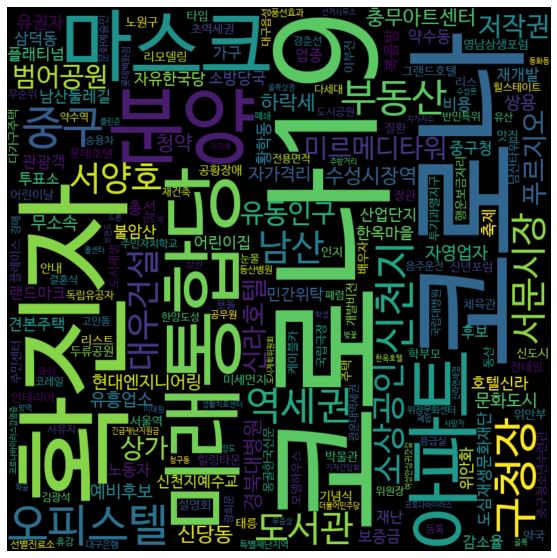

In [ ]:
wordcloud_maker(dict_1920['1920'][1],'1920')

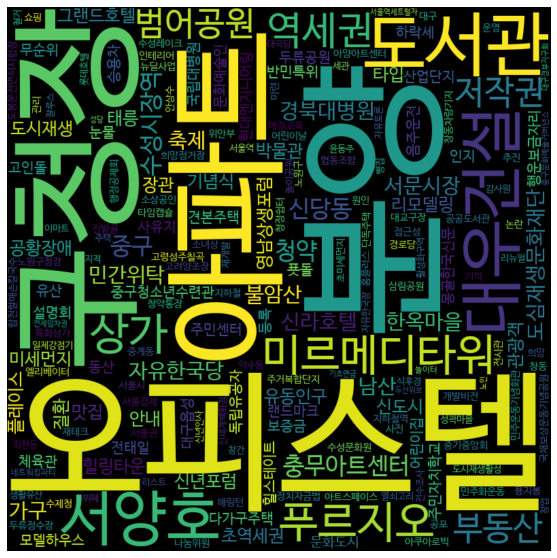

In [ ]:
wordcloud_maker(dict_2019['2019'][1],'2019')

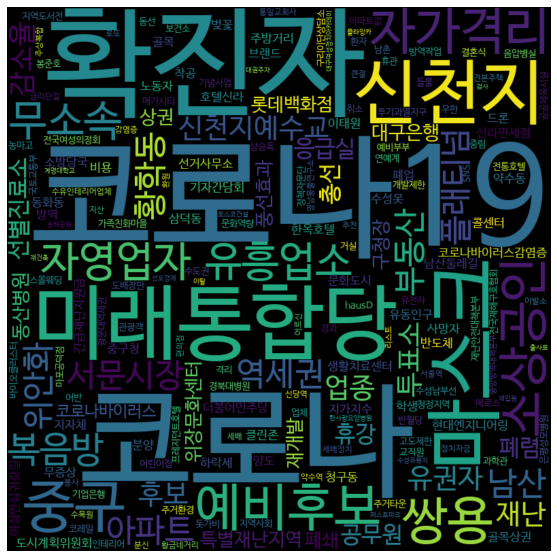

In [ ]:
wordcloud_maker(dict_2020['2020'][1],'2020')

In [ ]:
kor_mask = np.array(Image.open("/content/drive/My Drive/data/4507e3c6133af82e776c9a04bde1f4c4.png"))

In [ ]:
# 이미지 출처 : https://www.pinterest.co.kr/pin/514395588671378068/
def korcloud_maker(data,name):
  wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white",
    mask = kor_mask
)
  wordcloud = wordcloud.generate_from_frequencies(data)
  array = wordcloud.to_array()
  %matplotlib inline
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(10, 10))
  plt.imshow(array, interpolation="bilinear")
  plt.axis("off")
  plt.show()
  fig.savefig('wordcloud_{}.png'.format(name))

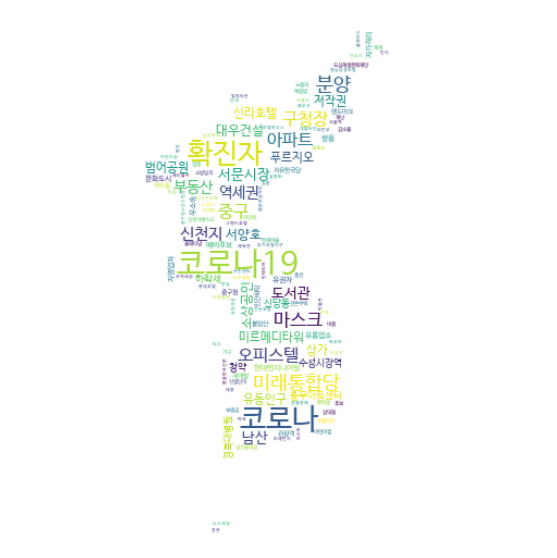

In [ ]:
korcloud_maker(dict_1920['1920'][1],'1920')